In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error

In [3]:
df=pd.read_csv("HousingData.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.shape

(506, 14)

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.shape

(394, 14)

In [13]:
corr=df.corr()

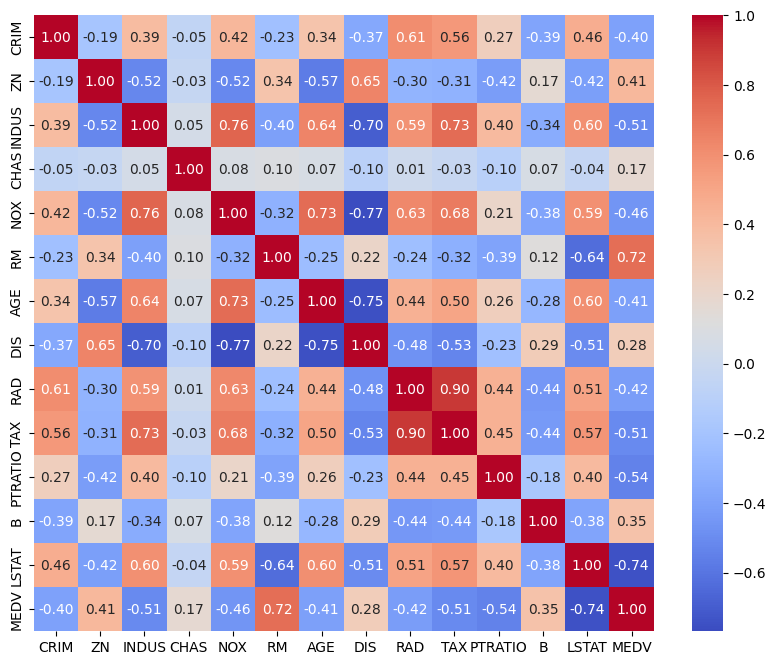

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

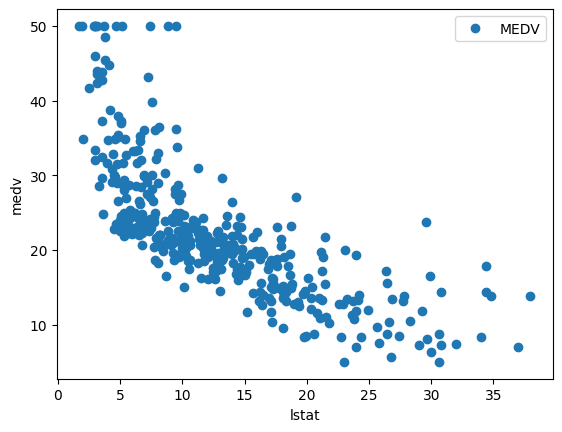

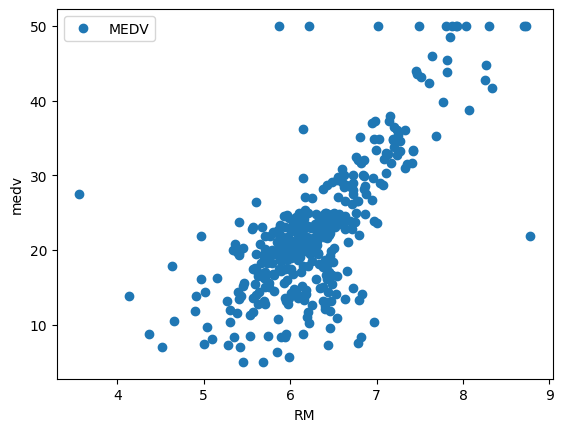

In [17]:
df.plot(x='LSTAT',y='MEDV',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()
df.plot(x='RM',y='MEDV',style='o')
plt.xlabel('RM')
plt.ylabel('medv')
plt.show()

In [24]:
df1=df.loc[:,['RM','MEDV']]
df1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
5,6.430,28.7


In [33]:
x=pd.DataFrame(df1['RM'])
y=pd.DataFrame(df1['MEDV'])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
lr.intercept_

array([-36.46388815])

In [45]:
lr.coef_

array([[9.3646384]])

In [46]:
y_pred.shape

(119, 1)

In [47]:
y_test.shape

(119, 1)

In [48]:
print("Mean Absolute Error :" ,mean_absolute_error(y_test,y_pred))
print("Meas Squared Error :" , mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :" , mean_squared_error(y_test,y_pred))

Mean Absolute Error : 4.21025512996237
Meas Squared Error : 36.841866268951804
Root Mean Squared Error : 36.841866268951804


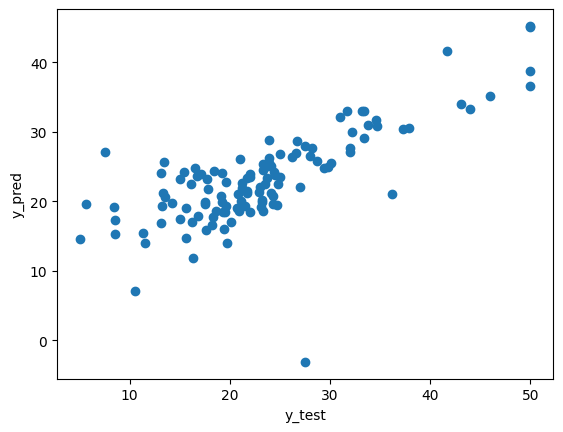

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

In [64]:
lr_scaled = LinearRegression()
lr_scaled.fit(x_train, y_train)
y_pred_scaled = lr_scaled.predict(x_test)

print("Scaled R²:", r2_score(y_test, y_pred_scaled))

Scaled R²: 0.4786797724382229


In [67]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
x_poly=pf.fit_transform(x_sc)
plm=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
plm.fit(x_train, y_train)
y_pred_scaled = plm.predict(x_test)

In [68]:
print("Scaled R²:", r2_score(y_test, y_pred_scaled))

Scaled R²: 0.5134161272669115


In [72]:
input=[[8.95]]
i=sc.transform(input)
predict=lr_scaled.predict(i)
predict

C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[47.17608766]])